In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cc_df = pd.read_csv('fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


# 1. 불필요한 컬럼을 제거

## 1) first, last, gender, 합쳐서 고유한 아이디 생성

In [7]:
cc_df.apply(lambda x: f"{x['first']}_{x['last']}_{x['gender']}", axis = 1)

0           Stephanie_Gill_F
1         Kenneth_Robinson_M
2                Mary_Wall_F
3           Daniel_Escobar_M
4             Jenna_Brooks_F
                 ...        
491129    Rebecca_Erickson_F
491130          Ana_Howell_F
491131        Jose_Vasquez_M
491132          Ann_Lawson_F
491133         Samuel_Frey_M
Length: 491134, dtype: object

In [8]:
cc_df['user_id'] = cc_df.apply(lambda x: f"{x['first']}_{x['last']}_{x['gender']}", axis = 1)

In [9]:
ncc_df = cc_df.drop(['first','last','gender'], axis = 1)

## 2) 주소도 detail하게 남길 필요 없다고 여겨져 삭제

In [10]:
ncc_df.drop(['street', 'zip', 'city', 'state'], axis = 1, inplace = True)

## 3) trans_num도 중복되지 않으면 크게 사기 예측에 필요하지 않다 여겨져 삭제, unix_time, job, 'merchant'도 필요하지 않다 여겨져 삭제하고자 함.

In [11]:
ncc_df[ncc_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,user_id


In [12]:
ncc_df['unix_time'].nunique()

488477

In [13]:
ncc_df['job'].nunique()

110

In [14]:
ncc_df['merchant'].nunique()

693

In [15]:
ncc_df.drop(['trans_num', 'unix_time', 'job', 'merchant'], axis = 1, inplace = True)

# 2. 최소 2개 이상의 새로운 피처(변수)를 생성

## 1) 생년월일을 나이로 변환 후 생년월일 컬럼 삭제

In [16]:
from datetime import datetime

In [17]:
pd.to_datetime(ncc_df['dob'])

0        1978-06-21
1        1980-12-21
2        1974-07-19
3        1971-11-05
4        1977-02-22
            ...    
491129   1983-02-08
491130   1984-06-03
491131   1999-12-27
491132   1981-11-29
491133   1993-05-10
Name: dob, Length: 491134, dtype: datetime64[ns]

In [18]:
ncc_df['dob'] = pd.to_datetime(ncc_df['dob'])

In [19]:
((datetime.today() - ncc_df['dob']).dt.days)//365

0         46
1         43
2         50
3         53
4         47
          ..
491129    41
491130    40
491131    24
491132    42
491133    31
Name: dob, Length: 491134, dtype: int64

In [20]:
ncc_df['age'] = ((datetime.today() - ncc_df['dob']).dt.days)//365

In [21]:
ncc_df.drop(['dob'], axis = 1, inplace = True)

In [22]:
ncc_df.head()

,trans_date_trans_time,cc_num,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,user_id,age
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,Stephanie_Gill_F,46
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,40.6747,-74.2239,124967,40.079588,-74.848087,0,Kenneth_Robinson_M,43
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,40.6152,-74.4150,71485,40.021888,-74.228188,0,Mary_Wall_F,50
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,42.2203,-83.3583,31515,42.360426,-83.552316,0,Daniel_Escobar_M,53
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,30.4066,-91.1468,378909,29.737426,-90.853194,0,Jenna_Brooks_F,47


In [23]:
ncc_df[ncc_df['is_fraud'] == 1].head(30)

,trans_date_trans_time,cc_num,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,user_id,age
4794,2019-01-12 00:59:01,581686439828,gas_transport,11.73,41.5205,-80.0573,5507,41.947427,-79.796264,1,Larry_House_M,51
4816,2019-01-12 03:48:07,581686439828,grocery_pos,328.68,41.5205,-80.0573,5507,42.148618,-79.398595,1,Larry_House_M,51
4979,2019-01-12 15:46:10,581686439828,food_dining,120.58,41.5205,-80.0573,5507,42.470024,-80.126576,1,Larry_House_M,51
5073,2019-01-12 19:53:59,581686439828,shopping_net,1081.35,41.5205,-80.0573,5507,42.455406,-79.521640,1,Larry_House_M,51
5124,2019-01-12 22:44:05,581686439828,shopping_net,776.70,41.5205,-80.0573,5507,40.680209,-79.099101,1,Larry_House_M,51
5160,2019-01-13 00:49:04,180031190491743,shopping_pos,952.08,30.7145,-88.0918,270712,30.803533,-88.140115,1,Becky_Mckinney_F,52
5171,2019-01-13 01:31:07,180031190491743,shopping_net,1060.34,30.7145,-88.0918,270712,31.602312,-88.685518,1,Becky_Mckinney_F,52
5240,2019-01-13 07:26:22,581686439828,grocery_pos,308.84,41.5205,-80.0573,5507,42.194299,-80.572425,1,Larry_House_M,51
5341,2019-01-13 13:32:07,180031190491743,kids_pets,19.19,30.7145,-88.0918,270712,30.917934,-88.582726,1,Becky_Mckinney_F,52
5453,2019-01-13 17:01:46,581686439828,shopping_net,1033.78,41.5205,-80.0573,5507,41.609588,-80.173127,1,Larry_House_M,51


# 2) 구매금액 - 평균 구매액 대비 많은 금액 사용 여부 확인하는 컬럼 생성 
- z score 사용

In [24]:
ncc_df['cc_num'].nunique()

124

In [25]:
ncc_df['cc_num'].value_counts()

cc_num
30270432095985      4392
6538441737335434    4392
4364010865167176    4386
4642255475285942    4386
6538891242532018    4386
                    ... 
36913587729122      3641
30551643947183      3638
4681601008538160    3638
4005676619255478    3638
3511378610369890    3628
Name: count, Length: 124, dtype: int64

In [26]:
ncc_df.groupby('cc_num')['amt'].agg(['mean', 'std'])

,mean,std
cc_num,,
503874407318,60.253406,127.265783
567868110212,83.442558,117.303828
571365235126,59.392974,134.289959
581686439828,58.578675,149.804992
630423337322,56.078113,159.201852
...,...,...
4792627764422477317,84.135134,107.316736
4797297220948468262,56.313583,247.931817
4861310130652566408,85.805306,130.998089


In [27]:
ncc_df.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()

,cc_num,mean,std
0,503874407318,60.253406,127.265783
1,567868110212,83.442558,117.303828
2,571365235126,59.392974,134.289959
3,581686439828,58.578675,149.804992
4,630423337322,56.078113,159.201852
...,...,...,...
119,4792627764422477317,84.135134,107.316736
120,4797297220948468262,56.313583,247.931817
121,4861310130652566408,85.805306,130.998089
122,4906628655840914250,54.243453,154.767184


In [28]:
amt_info = ncc_df.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()

In [29]:
ncc_df.merge(amt_info, on = 'cc_num', how = 'left')

,trans_date_trans_time,cc_num,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,user_id,age,mean,std
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,Stephanie_Gill_F,46,56.078113,159.201852
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,40.6747,-74.2239,124967,40.079588,-74.848087,0,Kenneth_Robinson_M,43,59.858059,132.138802
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,40.6152,-74.4150,71485,40.021888,-74.228188,0,Mary_Wall_F,50,87.328067,113.454416
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,42.2203,-83.3583,31515,42.360426,-83.552316,0,Daniel_Escobar_M,53,64.317839,174.739042
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,30.4066,-91.1468,378909,29.737426,-90.853194,0,Jenna_Brooks_F,47,90.747123,165.470881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,34.2651,-77.8670,186140,34.853497,-78.664158,0,Rebecca_Erickson_F,41,87.442772,129.935554
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,34.0326,-82.2027,1523,35.008839,-81.475156,0,Ana_Howell_F,40,58.181297,188.339282
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,29.0393,-95.4401,28739,29.661049,-96.186633,0,Jose_Vasquez_M,24,50.452289,168.361122
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,46.1966,-118.9017,3684,46.658340,-119.715054,0,Ann_Lawson_F,42,88.704297,119.948793


In [30]:
ncc_df = ncc_df.merge(amt_info, on = 'cc_num', how = 'left')

In [31]:
ncc_df['amt_z'] = (ncc_df['amt'] - ncc_df['mean'])/ncc_df['std']

In [32]:
ncc_df.drop(['mean', 'std'], axis = 1, inplace = True)

In [33]:
ncc_df.head(5)

,trans_date_trans_time,cc_num,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,user_id,age,amt_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,Stephanie_Gill_F,46,0.321302
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,40.6747,-74.2239,124967,40.079588,-74.848087,0,Kenneth_Robinson_M,43,-0.114637
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,40.6152,-74.4150,71485,40.021888,-74.228188,0,Mary_Wall_F,50,-0.361802
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,42.2203,-83.3583,31515,42.360426,-83.552316,0,Daniel_Escobar_M,53,-0.001304
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,30.4066,-91.1468,378909,29.737426,-90.853194,0,Jenna_Brooks_F,47,-0.393828


In [34]:
ncc_df[ncc_df['is_fraud'] == 1].head(30)

,trans_date_trans_time,cc_num,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,user_id,age,amt_z
4794,2019-01-12 00:59:01,581686439828,gas_transport,11.73,41.5205,-80.0573,5507,41.947427,-79.796264,1,Larry_House_M,51,-0.312731
4816,2019-01-12 03:48:07,581686439828,grocery_pos,328.68,41.5205,-80.0573,5507,42.148618,-79.398595,1,Larry_House_M,51,1.803020
4979,2019-01-12 15:46:10,581686439828,food_dining,120.58,41.5205,-80.0573,5507,42.470024,-80.126576,1,Larry_House_M,51,0.413880
5073,2019-01-12 19:53:59,581686439828,shopping_net,1081.35,41.5205,-80.0573,5507,42.455406,-79.521640,1,Larry_House_M,51,6.827351
5124,2019-01-12 22:44:05,581686439828,shopping_net,776.70,41.5205,-80.0573,5507,40.680209,-79.099101,1,Larry_House_M,51,4.793708
5160,2019-01-13 00:49:04,180031190491743,shopping_pos,952.08,30.7145,-88.0918,270712,30.803533,-88.140115,1,Becky_Mckinney_F,52,6.312303
5171,2019-01-13 01:31:07,180031190491743,shopping_net,1060.34,30.7145,-88.0918,270712,31.602312,-88.685518,1,Becky_Mckinney_F,52,7.105318
5240,2019-01-13 07:26:22,581686439828,grocery_pos,308.84,41.5205,-80.0573,5507,42.194299,-80.572425,1,Larry_House_M,51,1.670581
5341,2019-01-13 13:32:07,180031190491743,kids_pets,19.19,30.7145,-88.0918,270712,30.917934,-88.582726,1,Becky_Mckinney_F,52,-0.521211
5453,2019-01-13 17:01:46,581686439828,shopping_net,1033.78,41.5205,-80.0573,5507,41.609588,-80.173127,1,Larry_House_M,51,6.509805


# 3) 구매금액 - 카테고리별  많은 금액 사용 여부 확인하는 컬럼 생성 
- z score 사용

In [35]:
cat_info = ncc_df.groupby(['cc_num', 'category'])['amt'].agg(['mean', 'std']).reset_index()

In [36]:
cat_info

,cc_num,category,mean,std
0,503874407318,entertainment,73.282418,103.050402
1,503874407318,food_dining,38.712305,46.548436
2,503874407318,gas_transport,68.457820,14.730440
3,503874407318,grocery_net,48.931302,18.736252
4,503874407318,grocery_pos,61.987806,23.449569
...,...,...,...,...
1731,4956828990005111019,misc_pos,74.177012,168.341518
1732,4956828990005111019,personal_care,35.379382,44.082579
1733,4956828990005111019,shopping_net,70.019115,239.350164
1734,4956828990005111019,shopping_pos,45.988976,174.986921


In [37]:
ncc_df = ncc_df.merge(cat_info, on = ['cc_num', 'category'], how = 'left')

In [38]:
ncc_df['cat_z'] = (ncc_df['amt'] - ncc_df['mean'])/ncc_df['std']

In [39]:
ncc_df.drop(['mean', 'std'], axis = 1, inplace = True)

In [40]:
ncc_df.head(5)

,trans_date_trans_time,cc_num,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,user_id,age,amt_z,cat_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,Stephanie_Gill_F,46,0.321302,0.317631
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,40.6747,-74.2239,124967,40.079588,-74.848087,0,Kenneth_Robinson_M,43,-0.114637,-0.652060
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,40.6152,-74.4150,71485,40.021888,-74.228188,0,Mary_Wall_F,50,-0.361802,-0.723328
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,42.2203,-83.3583,31515,42.360426,-83.552316,0,Daniel_Escobar_M,53,-0.001304,0.211780
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,30.4066,-91.1468,378909,29.737426,-90.853194,0,Jenna_Brooks_F,47,-0.393828,-0.575698


# 4) 가맹점- 주소지 거리에 따른 금액 사용 여부 확인하는 컬럼 생성 (너무 먼곳에서 금액이 발생하지는 않는지 이상치 감지)
- z score 사용

In [41]:
# pip install geopy

In [42]:
from geopy.distance import distance

In [43]:
# distance((위도1, 경도1), (위도2, 경도2))
# 상점 위도, 경도 합치기
# data['merch_coord'] = pd.Series(zip(data['merch_lat'], data['merch_long'])) 

# 고객 위도, 경도 합치기
# data['cust_coord'] = pd.Series(zip(data['lat'], data['long']))

# data['distance'] = data.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)

In [44]:
ncc_df['merch_coord'] = pd.Series(zip(ncc_df['merch_lat'], ncc_df['merch_long'])) 
ncc_df['cust_coord'] = pd.Series(zip(ncc_df['lat'], ncc_df['long']))

In [45]:
ncc_df.apply(lambda x: distance(x['merch_coord'], x['cust_coord']).km, axis=1)

0          30.216618
1          84.714605
2          67.768167
3          22.322745
4          79.398244
             ...    
491129     98.043837
491130    127.240424
491131    100.023736
491132     80.887812
491133     72.380990
Length: 491134, dtype: float64

In [46]:
ncc_df['distance'] = ncc_df.apply(lambda x: distance(x['merch_coord'], x['cust_coord']).km, axis=1)

In [47]:
dist_info = ncc_df.groupby(['cc_num'])['distance'].agg(['mean', 'std']).reset_index()

In [48]:
ncc_df = ncc_df.merge(dist_info, on = 'cc_num', how = 'left')

In [49]:
ncc_df['dist_z'] = (ncc_df['distance'] - ncc_df['mean'])/ncc_df['std']

In [50]:
ncc_df.drop(['merch_coord', 'cust_coord', 'mean', 'std'], axis =1 ,inplace =True)

In [51]:
ncc_df.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis =1 ,inplace =True)

In [52]:
ncc_df.head()

,trans_date_trans_time,cc_num,category,amt,city_pop,is_fraud,user_id,age,amt_z,cat_z,distance,dist_z
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,149,0,Stephanie_Gill_F,46,0.321302,0.317631,30.216618,-1.475224
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,124967,0,Kenneth_Robinson_M,43,-0.114637,-0.652060,84.714605,0.345370
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,71485,0,Mary_Wall_F,50,-0.361802,-0.723328,67.768167,-0.272693
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,31515,0,Daniel_Escobar_M,53,-0.001304,0.211780,22.322745,-1.824486
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,378909,0,Jenna_Brooks_F,47,-0.393828,-0.575698,79.398244,0.002138


## 5) 거래간 평균 시간 

In [53]:
ncc_df['trans_date_trans_time'] = pd.to_datetime(ncc_df['trans_date_trans_time'])

In [54]:
ncc_df.groupby('cc_num')['trans_date_trans_time'].diff()

0                    NaT
1                    NaT
2                    NaT
3                    NaT
4                    NaT
               ...      
491129   0 days 00:26:19
491130   0 days 01:27:37
491131   0 days 02:42:23
491132   0 days 00:12:04
491133   0 days 01:58:56
Name: trans_date_trans_time, Length: 491134, dtype: timedelta64[ns]

In [55]:
ncc_df['trans_time_diff'] = ncc_df.groupby('cc_num')['trans_date_trans_time'].diff().dt.seconds / 60

In [56]:
ncc_df['trans_time_diff']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
491129     26.316667
491130     87.616667
491131    162.383333
491132     12.066667
491133    118.933333
Name: trans_time_diff, Length: 491134, dtype: float64

In [57]:
# ncc_df.groupby('cc_num')['trans_time_diff'].mean()
ncc_df['trans_time_avg'] = ncc_df.groupby('cc_num')['trans_time_diff'].transform('mean')

In [58]:
ncc_df.head()

,trans_date_trans_time,cc_num,category,amt,city_pop,is_fraud,user_id,age,amt_z,cat_z,distance,dist_z,trans_time_diff,trans_time_avg
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,149,0,Stephanie_Gill_F,46,0.321302,0.317631,30.216618,-1.475224,NaN,234.101575
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,124967,0,Kenneth_Robinson_M,43,-0.114637,-0.652060,84.714605,0.345370,NaN,272.855356
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,71485,0,Mary_Wall_F,50,-0.361802,-0.723328,67.768167,-0.272693,NaN,228.416549
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,31515,0,Daniel_Escobar_M,53,-0.001304,0.211780,22.322745,-1.824486,NaN,266.560560
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,378909,0,Jenna_Brooks_F,47,-0.393828,-0.575698,79.398244,0.002138,NaN,229.260985


In [59]:
ncc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   category               491134 non-null  object        
 3   amt                    491134 non-null  float64       
 4   city_pop               491134 non-null  int64         
 5   is_fraud               491134 non-null  int64         
 6   user_id                491134 non-null  object        
 7   age                    491134 non-null  int64         
 8   amt_z                  491134 non-null  float64       
 9   cat_z                  491134 non-null  float64       
 10  distance               491134 non-null  float64       
 11  dist_z                 491134 non-null  float64       
 12  trans_time_diff        491010 non-null  floa

In [60]:
ncc_df['trans_time_diff'].fillna(0, inplace=True)

In [61]:
ncc_df['trans_time_avg'].fillna(0, inplace=True)

/tmp/ipykernel_12849/1871821004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ncc_df['trans_time_avg'].fillna(0, inplace=True)


In [62]:
ncc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   category               491134 non-null  object        
 3   amt                    491134 non-null  float64       
 4   city_pop               491134 non-null  int64         
 5   is_fraud               491134 non-null  int64         
 6   user_id                491134 non-null  object        
 7   age                    491134 non-null  int64         
 8   amt_z                  491134 non-null  float64       
 9   cat_z                  491134 non-null  float64       
 10  distance               491134 non-null  float64       
 11  dist_z                 491134 non-null  float64       
 12  trans_time_diff        491134 non-null  floa

## 6) 거래 시간 분석 (실무팁 참조)

In [63]:
ncc_df['hour'] = pd.to_datetime(ncc_df['trans_date_trans_time']).dt.hour

In [64]:
ncc_df['hour']

0          0
1          0
2          0
3          0
4          0
          ..
491129    23
491130    23
491131    23
491132    23
491133    23
Name: hour, Length: 491134, dtype: int32

In [65]:
def hour_func(x):
    if (x >= 6) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 18):
        return 'afternoon'
    elif (x >= 18) & (x < 23):
        return 'evening'
    else:
        return 'night'        

In [66]:
ncc_df['hour_cat'] = ncc_df['hour'].apply(hour_func)

In [67]:
ncc_df

,trans_date_trans_time,cc_num,category,amt,city_pop,is_fraud,user_id,age,amt_z,cat_z,distance,dist_z,trans_time_diff,trans_time_avg,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,149,0,Stephanie_Gill_F,46,0.321302,0.317631,30.216618,-1.475224,0.000000,234.101575,0,night
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,124967,0,Kenneth_Robinson_M,43,-0.114637,-0.652060,84.714605,0.345370,0.000000,272.855356,0,night
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,71485,0,Mary_Wall_F,50,-0.361802,-0.723328,67.768167,-0.272693,0.000000,228.416549,0,night
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,31515,0,Daniel_Escobar_M,53,-0.001304,0.211780,22.322745,-1.824486,0.000000,266.560560,0,night
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,378909,0,Jenna_Brooks_F,47,-0.393828,-0.575698,79.398244,0.002138,0.000000,229.260985,0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,186140,0,Rebecca_Erickson_F,41,0.360311,1.450980,98.043837,0.710346,26.316667,230.337332,23,night
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,1523,0,Ana_Howell_F,40,-0.173577,-0.128877,127.240424,1.663843,87.616667,229.844356,23,night
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,28739,0,Jose_Vasquez_M,24,0.364619,1.163822,100.023736,0.693848,162.383333,256.361006,23,night
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,3684,0,Ann_Lawson_F,42,-0.015209,0.440137,80.887812,0.288293,12.066667,266.441283,23,night


In [68]:
all_cnt = ncc_df.groupby('cc_num')['amt'].count().reset_index()

In [69]:
hour_cnt = ncc_df.groupby(['cc_num', 'hour_cat'])['amt'].count(). reset_index()

In [70]:
all_cnt

,cc_num,amt
0,503874407318,3655
1,567868110212,3644
2,571365235126,4374
3,581686439828,3653
4,630423337322,4362
...,...,...
119,4792627764422477317,4357
120,4797297220948468262,3653
121,4861310130652566408,3643
122,4906628655840914250,3655


In [71]:
hour_cnt

,cc_num,hour_cat,amt
0,503874407318,afternoon,1280
1,503874407318,evening,1080
2,503874407318,morning,558
3,503874407318,night,737
4,567868110212,afternoon,1228
...,...,...,...
491,4906628655840914250,night,800
492,4956828990005111019,afternoon,1277
493,4956828990005111019,evening,1038
494,4956828990005111019,morning,558


In [72]:
hour_cnt = hour_cnt.merge(all_cnt, on = 'cc_num', how = 'left')

In [73]:
hour_cnt

,cc_num,hour_cat,amt_x,amt_y
0,503874407318,afternoon,1280,3655
1,503874407318,evening,1080,3655
2,503874407318,morning,558,3655
3,503874407318,night,737,3655
4,567868110212,afternoon,1228,3644
...,...,...,...,...
491,4906628655840914250,night,800,3655
492,4956828990005111019,afternoon,1277,3657
493,4956828990005111019,evening,1038,3657
494,4956828990005111019,morning,558,3657


In [76]:
hour_cnt = hour_cnt.rename({'amt_x': 'hour_cnt', 'amt_y': 'total_cnt'}, axis = 1)

In [77]:
hour_cnt.head()

,cc_num,hour_cat,hour_cnt,total_cnt
0,503874407318,afternoon,1280,3655
1,503874407318,evening,1080,3655
2,503874407318,morning,558,3655
3,503874407318,night,737,3655
4,567868110212,afternoon,1228,3644


In [78]:
hour_cnt['hour_perc'] = hour_cnt['hour_cnt'] / hour_cnt['total_cnt']

In [80]:
hour_cnt['hour_perc']

0      0.350205
1      0.295486
2      0.152668
3      0.201642
4      0.336992
         ...   
491    0.218878
492    0.349193
493    0.283839
494    0.152584
495    0.214383
Name: hour_perc, Length: 496, dtype: float64

In [81]:
hour_cnt.head()

,cc_num,hour_cat,hour_cnt,total_cnt,hour_perc
0,503874407318,afternoon,1280,3655,0.350205
1,503874407318,evening,1080,3655,0.295486
2,503874407318,morning,558,3655,0.152668
3,503874407318,night,737,3655,0.201642
4,567868110212,afternoon,1228,3644,0.336992


In [82]:
hour_cnt = hour_cnt[['cc_num', 'hour_cat', 'hour_perc']]

In [83]:
hour_cnt.head()

,cc_num,hour_cat,hour_perc
0,503874407318,afternoon,0.350205
1,503874407318,evening,0.295486
2,503874407318,morning,0.152668
3,503874407318,night,0.201642
4,567868110212,afternoon,0.336992


In [84]:
ncc_df.head()

,trans_date_trans_time,cc_num,category,amt,city_pop,is_fraud,user_id,age,amt_z,cat_z,distance,dist_z,trans_time_diff,trans_time_avg,hour,hour_cat
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,149,0,Stephanie_Gill_F,46,0.321302,0.317631,30.216618,-1.475224,0.0,234.101575,0,night
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,124967,0,Kenneth_Robinson_M,43,-0.114637,-0.652060,84.714605,0.345370,0.0,272.855356,0,night
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,71485,0,Mary_Wall_F,50,-0.361802,-0.723328,67.768167,-0.272693,0.0,228.416549,0,night
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,31515,0,Daniel_Escobar_M,53,-0.001304,0.211780,22.322745,-1.824486,0.0,266.560560,0,night
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,378909,0,Jenna_Brooks_F,47,-0.393828,-0.575698,79.398244,0.002138,0.0,229.260985,0,night


In [85]:
ncc_df = ncc_df.merge(hour_cnt, on = ['cc_num', 'hour_cat'], how = 'left')

In [86]:
ncc_df.head()

,trans_date_trans_time,cc_num,category,amt,city_pop,is_fraud,user_id,age,amt_z,cat_z,distance,dist_z,trans_time_diff,trans_time_avg,hour,hour_cat,hour_perc
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,149,0,Stephanie_Gill_F,46,0.321302,0.317631,30.216618,-1.475224,0.0,234.101575,0,night,0.196470
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,124967,0,Kenneth_Robinson_M,43,-0.114637,-0.652060,84.714605,0.345370,0.0,272.855356,0,night,0.214383
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,71485,0,Mary_Wall_F,50,-0.361802,-0.723328,67.768167,-0.272693,0.0,228.416549,0,night,0.217252
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,31515,0,Daniel_Escobar_M,53,-0.001304,0.211780,22.322745,-1.824486,0.0,266.560560,0,night,0.213600
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,378909,0,Jenna_Brooks_F,47,-0.393828,-0.575698,79.398244,0.002138,0.0,229.260985,0,night,0.202882


In [88]:
ncc_df['user_id'].nunique()

124

In [89]:
ncc_df['category'].nunique()

14

In [90]:
#불필요 컬럼 제거 (사용자별 분석이 아니므로 사용자 정보도 일단 제거, 
ncc_df.drop(['trans_date_trans_time', 'cc_num', 'user_id', 'trans_time_diff', 'hour', 'hour_cat'], axis = 1, inplace = True)

In [91]:
ncc_df.head()

,category,amt,city_pop,is_fraud,age,amt_z,cat_z,distance,dist_z,trans_time_avg,hour_perc
0,grocery_pos,107.23,149,0,46,0.321302,0.317631,30.216618,-1.475224,234.101575,0.196470
1,grocery_pos,44.71,124967,0,43,-0.114637,-0.652060,84.714605,0.345370,272.855356,0.214383
2,grocery_net,46.28,71485,0,50,-0.361802,-0.723328,67.768167,-0.272693,228.416549,0.217252
3,grocery_pos,64.09,31515,0,53,-0.001304,0.211780,22.322745,-1.824486,266.560560,0.213600
4,misc_pos,25.58,378909,0,47,-0.393828,-0.575698,79.398244,0.002138,229.260985,0.202882


# 3. One hot encoding

In [92]:
ncc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   category        491134 non-null  object 
 1   amt             491134 non-null  float64
 2   city_pop        491134 non-null  int64  
 3   is_fraud        491134 non-null  int64  
 4   age             491134 non-null  int64  
 5   amt_z           491134 non-null  float64
 6   cat_z           491134 non-null  float64
 7   distance        491134 non-null  float64
 8   dist_z          491134 non-null  float64
 9   trans_time_avg  491134 non-null  float64
 10  hour_perc       491134 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 41.2+ MB


In [96]:
ncc_df = pd.get_dummies(ncc_df, columns = ['category'], drop_first = True)

In [97]:
ncc_df

,amt,city_pop,is_fraud,age,amt_z,cat_z,distance,dist_z,trans_time_avg,hour_perc,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,107.23,149,0,46,0.321302,0.317631,30.216618,-1.475224,234.101575,0.196470,False,False,False,True,False,False,False,False,False,False,False,False,False
1,44.71,124967,0,43,-0.114637,-0.652060,84.714605,0.345370,272.855356,0.214383,False,False,False,True,False,False,False,False,False,False,False,False,False
2,46.28,71485,0,50,-0.361802,-0.723328,67.768167,-0.272693,228.416549,0.217252,False,False,True,False,False,False,False,False,False,False,False,False,False
3,64.09,31515,0,53,-0.001304,0.211780,22.322745,-1.824486,266.560560,0.213600,False,False,False,True,False,False,False,False,False,False,False,False,False
4,25.58,378909,0,47,-0.393828,-0.575698,79.398244,0.002138,229.260985,0.202882,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,134.26,186140,0,41,0.360311,1.450980,98.043837,0.710346,230.337332,0.209201,False,False,False,False,False,True,False,False,False,False,False,False,False
491130,25.49,1523,0,40,-0.173577,-0.128877,127.240424,1.663843,229.844356,0.207534,False,False,False,False,False,False,False,False,False,False,False,True,False
491131,111.84,28739,0,24,0.364619,1.163822,100.023736,0.693848,256.361006,0.160339,False,False,False,False,False,False,True,False,False,False,False,False,False
491132,86.88,3684,0,42,-0.015209,0.440137,80.887812,0.288293,266.441283,0.218022,False,False,False,False,False,False,True,False,False,False,False,False,False


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='amt'>

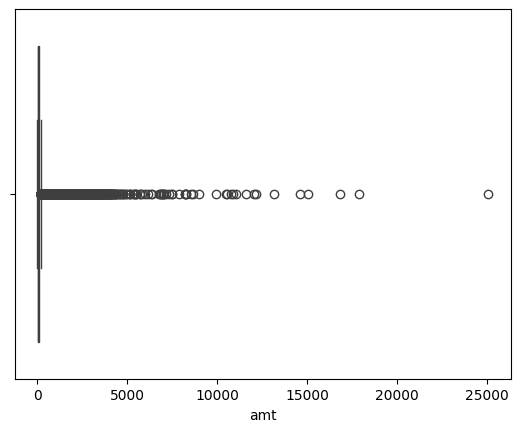

In [99]:
sns.boxplot(x=ncc_df['amt'])

In [100]:
# 이상치가 사기 거래 일 수 있어 일단 모두 유지